# Face Detection 

In [1]:
# !pip install mtcnn
# !pip install keras_vggface
#!pip install keras_applications

In [2]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN #multi task convoluted neural network

In [3]:
from matplotlib.patches import Rectangle

In [4]:
from numpy import asarray
from PIL import Image 
# PIL can be pretty buggy and bothersome in installation
# dont worry too much if it fails , we use it for face extraction , there can be otherways

In [5]:
image_path = r'face_recog_data/train/WhatsApp Image 2024-04-30 at 5.30.03 PM.jpeg'
image = plt.imread(image_path)

In [6]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
{'box': [408, 41, 89, 111], 'confidence': 1.0, 'keypoints': {'left_eye': (436, 83), 'right_eye': (478, 83), 'nose': (459, 102), 'mouth_left': (439, 124), 'mouth_right': (476, 123)}}
{'box': [585, 146, 88, 109], 'confidence': 1.0, 'keypoints': {'left_eye': (604, 190), 'right_eye': (646, 192), 'nose': (620, 211), 'mouth_left': (604, 227), 'mouth_right': (639, 230)}}
{'box': [265, 125, 79, 105], 'confidence': 0.9999860525131226, 'keypoints': {'left_eye': (290, 167), 'right_eye': (328, 164), 'nose': 

In [7]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill = False, color = 'yellow')
        ax.add_patch(face_border)
    plt.show()

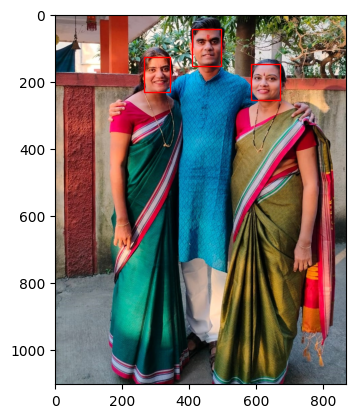

In [8]:
highlight_faces(image_path,faces)

In [9]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


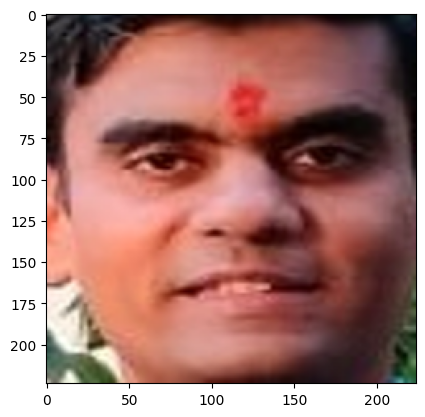

In [10]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

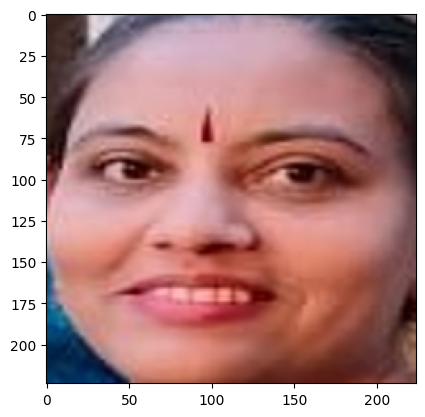

In [11]:
plt.imshow(extracted_face[1])
plt.show()

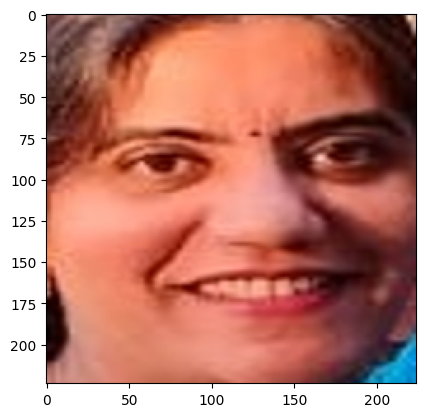

In [12]:
plt.imshow(extracted_face[2])
plt.show()

# Face Recognition

In [13]:
faces_path = r"D:\NIKHILESH\ML_AI\DEEP LEARNING\Face detection, extraction and recognition\face_recog_data\train"

In [14]:
import os

In [15]:
files=os.listdir(faces_path)

In [16]:
files

['IMG_20200112_120613.jpg',
 'IMG_20200211_221614.jpg',
 'WhatsApp Image 2024-04-30 at 5.30.03 PM.jpeg',
 'WhatsApp Image 2024-04-30 at 8.14.06 PM.jpeg',
 'WhatsApp Image 2024-04-30 at 8.14.27 PM.jpeg',
 'WhatsApp Image 2024-04-30 at 8.15.06 PM.jpeg']

In [17]:
#files=[x for x in files if x[0]!='.'] # to remove system files 

In [18]:
stored_faces = []

In [19]:
for file in files:
    extracted_face = extract_face_from_image(faces_path + '/' + file)
    for face in extracted_face:
        stored_faces.append(face)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


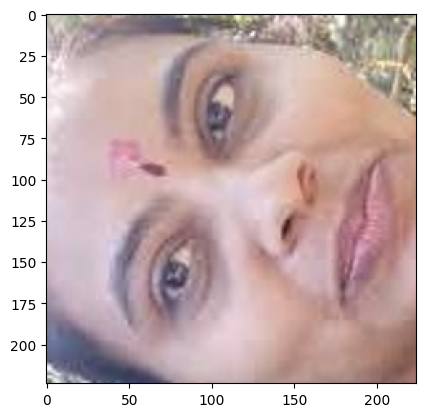

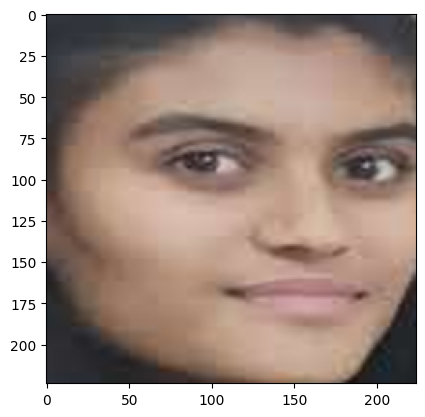

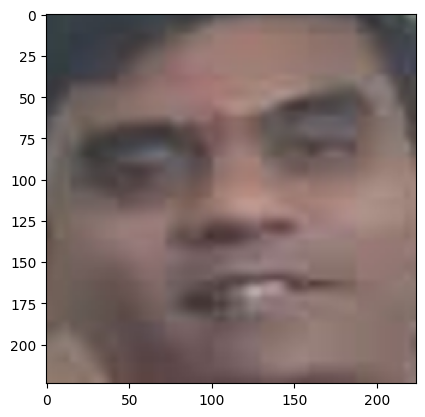

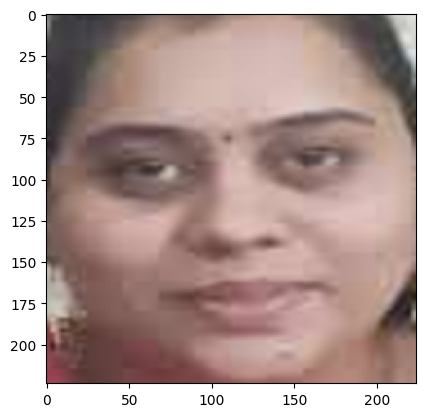

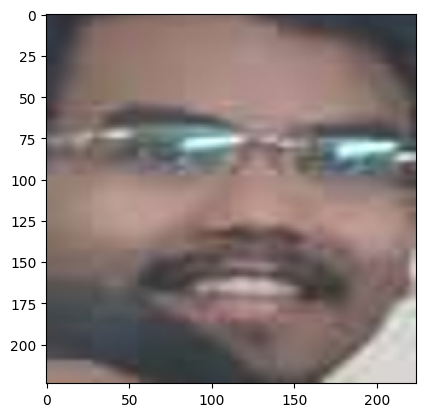

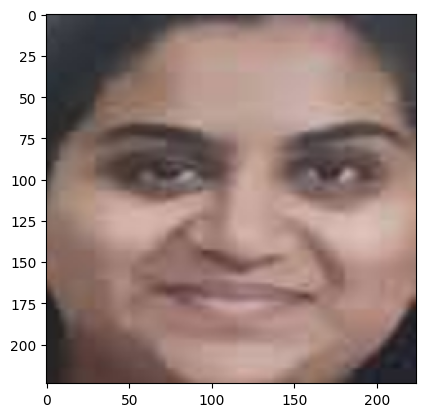

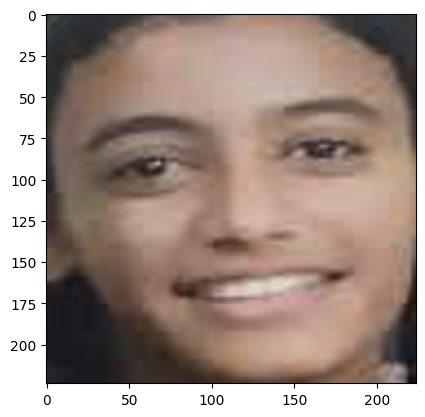

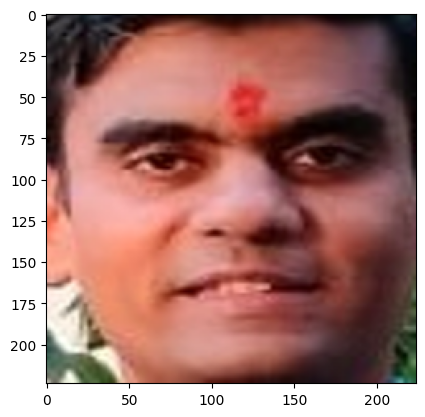

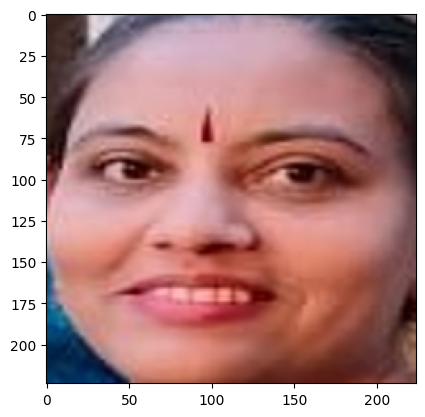

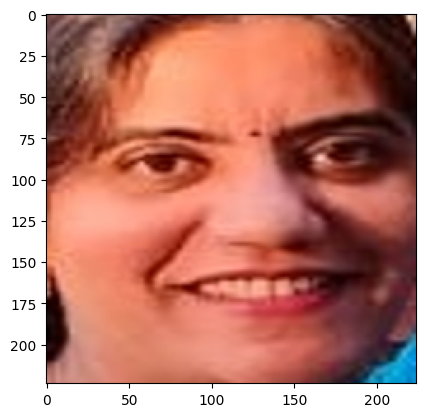

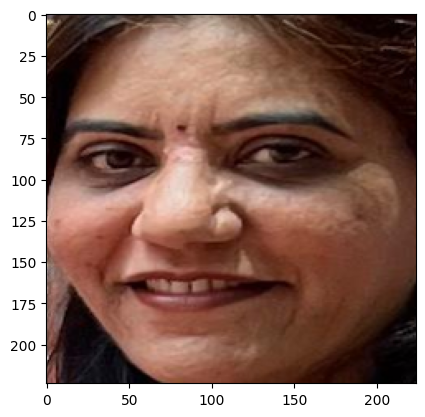

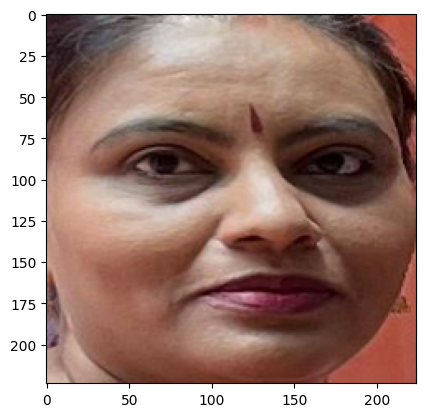

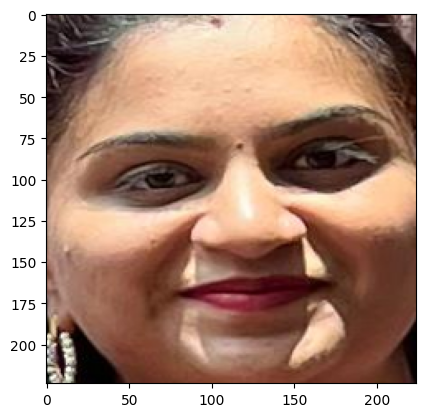

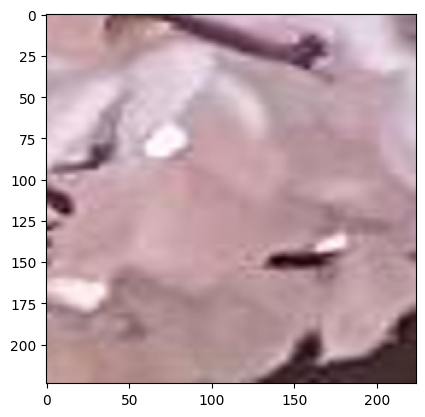

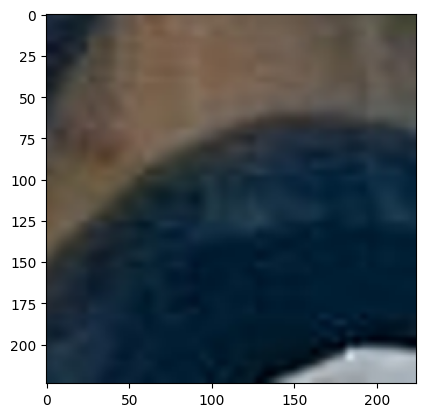

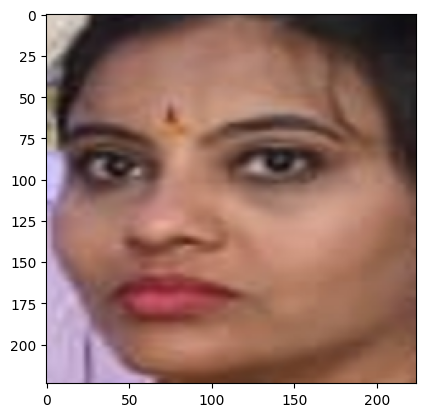

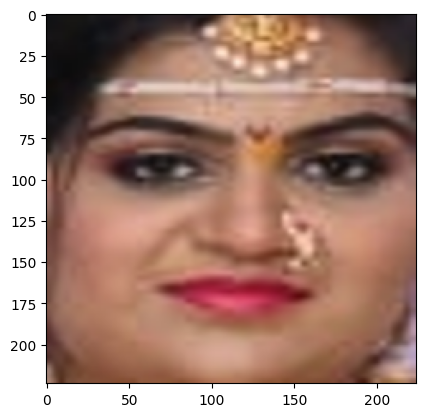

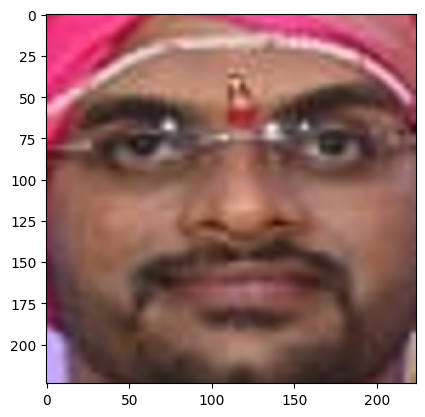

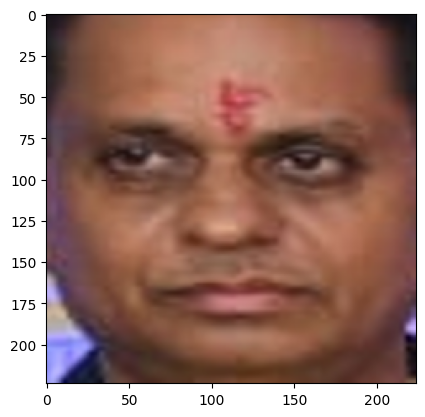

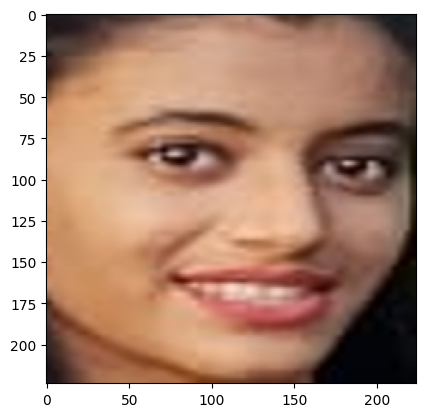

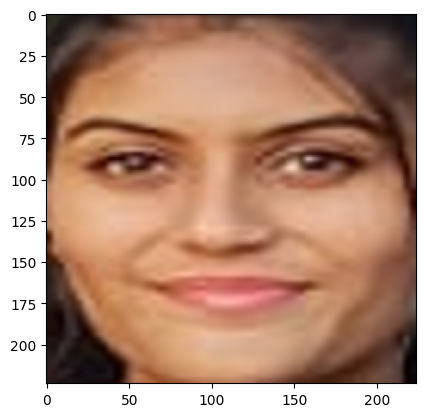

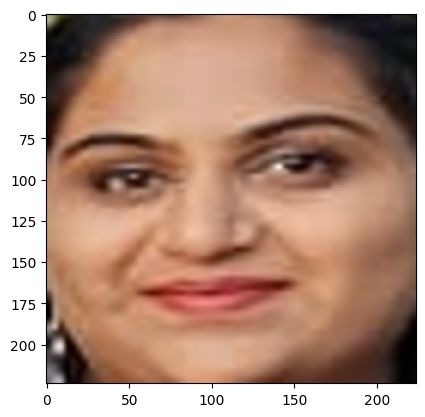

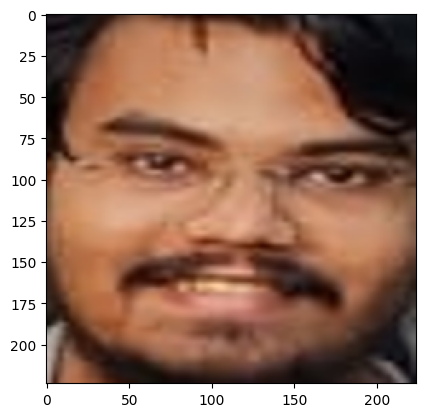

In [23]:
for i in range(len(stored_faces)):
    plt.imshow(stored_faces[i])
    plt.show()

In [39]:
names=[ 'Pooja Narkhede','Neha Bendale','Jaynat Chaudhari', 'Pranita Chaudhari','Nikhilesh Narkhede','Nikita Narkhede', 'Shreya Bendale', 'Jaynat Chaudhari ',
       'Pooja Narkhede ','Neelam Bendale','Neelam Bendale ','Pooja Narkhede  ','Nikita Narkhede ','UKNOWN','UKNOWN ','Pooja Narkhede   ','Nikita Narkhede   ','Kunal Bhade',
       'Nishikant Narkhede','Shreya Bendale ','Neha Bendale ','Nikita Narkhede    ','Nikhilesh Narkhede ']

In [87]:
#!pip install --upgrade keras

In [25]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [26]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model ='resnet50',
      include_top = False,
      input_shape = (224, 224, 3),
      pooling = 'avg')

    # perform prediction
    return model.predict(samples)


stored_faces_embeddings = get_model_scores(stored_faces)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [27]:
stored_faces_embeddings.shape

(23, 2048)

In [44]:
stored_faces_embeddings_dict = dict(zip(names,stored_faces_embeddings))

In [47]:
stored_faces_embeddings_dict

{'Pooja Narkhede': array([0.       , 5.3700495, 0.       , ..., 0.       , 7.5199113,
        1.3222803], dtype=float32),
 'Neha Bendale': array([0.11875515, 4.2767024 , 1.2395622 , ..., 5.764054  , 0.00685111,
        0.22273421], dtype=float32),
 'Jaynat Chaudhari': array([ 0.       , 13.4715605,  0.544139 , ..., 12.265174 ,  0.       ,
         0.       ], dtype=float32),
 'Pranita Chaudhari': array([0.       , 9.730423 , 0.       , ..., 0.       , 1.5261835,
        2.4559352], dtype=float32),
 'Nikhilesh Narkhede': array([0.        , 1.3041419 , 4.432544  , ..., 0.44348505, 0.61460453,
        0.        ], dtype=float32),
 'Nikita Narkhede': array([0.29320788, 4.153994  , 0.        , ..., 3.6597931 , 0.6176412 ,
        1.4247029 ], dtype=float32),
 'Shreya Bendale': array([ 0.       ,  0.       ,  0.5723837, ...,  8.272232 ,  0.0409111,
        12.302316 ], dtype=float32),
 'Jaynat Chaudhari ': array([0.0000000e+00, 8.8720531e+00, 1.0256582e-02, ..., 1.0860965e+01,
        0.0000

In [2]:
# {'Pooja Narkhede': array([0.       , 5.3700495, 0.       , ..., 0.       , 7.5199113,
#         1.3222803], dtype=float32),
#  'Neha Bendale': array([0.11875515, 4.2767024 , 1.2395622 , ..., 5.764054  , 0.00685111,
#         0.22273421], dtype=float32),
#  'Jaynat Chaudhari': array([ 0.       , 13.4715605,  0.544139 , ..., 12.265174 ,  0.       ,
#          0.       ], dtype=float32),
#  'Pranita Chaudhari': array([0.       , 9.730423 , 0.       , ..., 0.       , 1.5261835,
#         2.4559352], dtype=float32),
#  'Nikhilesh Narkhede': array([0.        , 1.3041419 , 4.432544  , ..., 0.44348505, 0.61460453,
#         0.        ], dtype=float32),
#  'Nikita Narkhede': array([0.29320788, 4.153994  , 0.        , ..., 3.6597931 , 0.6176412 ,
#         1.4247029 ], dtype=float32),
#  'Shreya Bendale': array([ 0.       ,  0.       ,  0.5723837, ...,  8.272232 ,  0.0409111,
#         12.302316 ], dtype=float32),
#  'Jaynat Chaudhari ': array([0.0000000e+00, 8.8720531e+00, 1.0256582e-02, ..., 1.0860965e+01,
#         0.0000000e+00, 0.0000000e+00], dtype=float32),
#  'Pooja Narkhede ': array([0.       , 4.58382  , 0.       , ..., 0.       , 0.7381062,
#         5.508935 ], dtype=float32),
#  'Neelam Bendale': array([0.       , 4.384361 , 0.       , ..., 1.134505 , 0.4584938,
#         2.4072797], dtype=float32),
#  'Neelam Bendale ': array([0.        , 6.2106094 , 0.        , ..., 1.4382588 , 0.24383461,
#         0.14727072], dtype=float32),
#  'Pooja Narkhede  ': array([0.        , 3.1379955 , 0.        , ..., 0.43782377, 0.69791794,
#         7.489618  ], dtype=float32),
#  'Nikita Narkhede ': array([0.0000000e+00, 8.2265968e+00, 3.1756091e-01, ..., 3.0489907e-01,
#         4.3176329e-01, 3.4407354e-03], dtype=float32),
#  'UKNOWN': array([0.        , 0.        , 0.15734445, ..., 1.043783  , 2.2837868 ,
#         0.02206942], dtype=float32),
#  'UKNOWN ': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
#  'Pooja Narkhede   ': array([0.        , 2.5643382 , 0.        , ..., 0.3311895 , 0.74259955,
#         3.2848613 ], dtype=float32),
#  'Nikita Narkhede   ': array([2.9351163 , 0.17415589, 0.        , ..., 0.03665203, 0.7500308 ,
#         0.04217861], dtype=float32),
#  'Kunal Bhade': array([0.        , 6.79297   , 0.67089105, ..., 0.        , 0.2540136 ,
#         8.597438  ], dtype=float32),
#  'Nishikant Narkhede': array([0.        , 6.9077826 , 0.        , ..., 3.9907796 , 0.        ,
#         0.00730529], dtype=float32),
#  'Shreya Bendale ': array([0.08282967, 2.6305835 , 0.29356894, ..., 0.36602843, 1.7322907 ,
#         3.0832896 ], dtype=float32),
#  'Neha Bendale ': array([0.       , 0.7005689, 0.1509811, ..., 4.3716645, 0.0303905,
#         0.3033685], dtype=float32),
#  'Nikita Narkhede    ': array([0.17721893, 2.4591377 , 0.00622527, ..., 0.01789007, 0.07226176,
#         2.9611704 ], dtype=float32),
#  'Nikhilesh Narkhede ': array([0.        , 6.0374675 , 0.15963365, ..., 0.8879133 , 1.3488016 ,
#         0.        ], dtype=float32)}

In [63]:
def get_match(face_score):
    
    no_match=True
    
    for i,j in stored_faces_embeddings_dict.items():
        if cosine(face_score,j)<0.4:
            print(i)
            no_match=False
            break
    if no_match:
        print('No Match')
    

## Working On Test Data.

In [86]:
test_file = r"D:\NIKHILESH\ML_AI\DEEP LEARNING\Face detection, extraction and recognition\face_recog_data\test\WhatsApp Image 2024-04-30 at 5.25.54 PM.jpeg"

In [87]:
image = plt.imread(test_file)

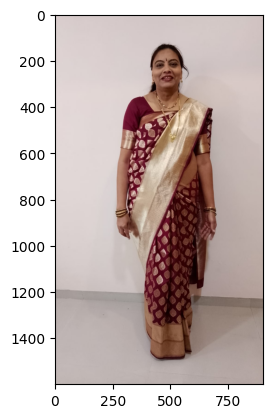

In [88]:
plt.imshow(image)

In [89]:
faces_in_image = extract_face_from_image(test_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


In [93]:
face_scores=get_model_scores(faces_in_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


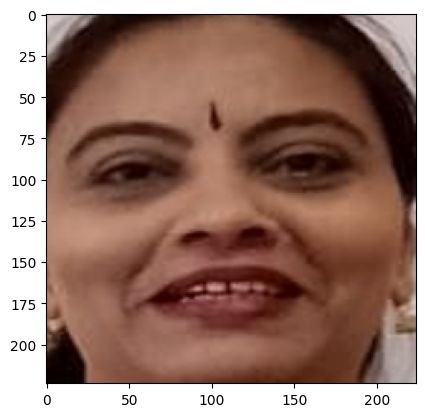

In [94]:
plt.imshow(faces_in_image[0])
plt.show()

In [95]:
get_match(face_scores[0])

Pooja Narkhede 


In [96]:
test_file = r"D:\NIKHILESH\ML_AI\DEEP LEARNING\Face detection, extraction and recognition\face_recog_data\test\IMG_20190824_162957.jpg"

In [97]:
image = plt.imread(test_file)

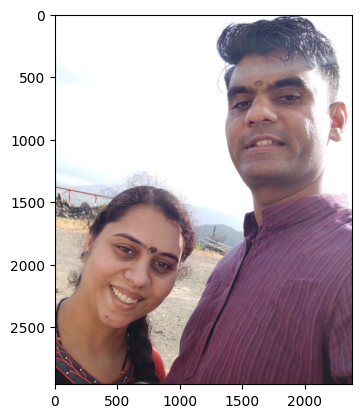

In [98]:
plt.imshow(image)

In [99]:
faces_in_image = extract_face_from_image(test_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


In [102]:
face_scores=get_model_scores(faces_in_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


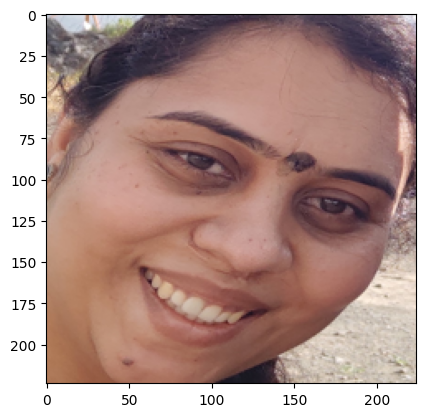

Pranita Chaudhari


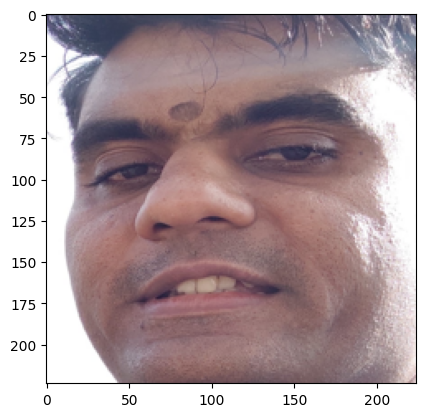

Jaynat Chaudhari


In [103]:
for i in range(len(faces_in_image)):
    plt.imshow(faces_in_image[i])
    plt.show()
    get_match(face_scores[i])